In [142]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import altair as alt
import plotly.express as px
import seaborn as sns
from matplotlib.widgets import Cursor
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.ticker as ticker

# Read in the data
url = 'https://gist.githubusercontent.com/IndiraSiripurapu/d658c42af84bf864e2883e22f28733d3/raw/964a83a818a23fda9a495d967f9e82c2b7c059ab/BIGDATAPROJECT.csv'
df = pd.read_csv(url)


PREPROCESSING

In [143]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Read in the data
url = 'https://gist.githubusercontent.com/IndiraSiripurapu/d658c42af84bf864e2883e22f28733d3/raw/964a83a818a23fda9a495d967f9e82c2b7c059ab/BIGDATAPROJECT.csv'
df = pd.read_csv(url)

# Convert the state and county columns into a list of transactions
transactions = df.groupby(['State'])['tot_cases'].sum().reset_index().values.tolist()

# Convert the transactions into a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Generate frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print the top 10 rules based on the lift metric
print(rules.nlargest(10, 'lift'))

                                         antecedents  \
0  (01,06,35010,63,7861,34,61790,4615,82,92931,50...   
1                                         (Colorado)   
2                                    (West Virginia)   
3  (01,64,5812,40,52902,23,7533,07,70020,69,06614...   
4                                        (Minnesota)   
5  (015,57,5364,62,98416,93,56568,10,2088,43,7791...   
6                             (District of Columbia)   
7  (017430,14,98838,4995,71,5079,49,7543,96,3944,...   
8                                            (Texas)   
9  (1,03,299312,01,86829,95,000410,61,79154,39420...   

                                         consequents  antecedent support  \
0                                         (Colorado)            0.019231   
1  (01,06,35010,63,7861,34,61790,4615,82,92931,50...            0.019231   
2  (01,64,5812,40,52902,23,7533,07,70020,69,06614...            0.019231   
3                                    (West Virginia)            0.019231   
4  

In [144]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Read in the data
url = 'https://gist.githubusercontent.com/IndiraSiripurapu/d658c42af84bf864e2883e22f28733d3/raw/964a83a818a23fda9a495d967f9e82c2b7c059ab/BIGDATAPROJECT.csv'
df = pd.read_csv(url)

# Drop any rows with missing values
df.dropna(inplace=True)

# Encode categorical variables as integers
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['State'] = label_encoder.fit_transform(df['State'])

# Scale the continuous variables to a range of 0-1
scaler = MinMaxScaler()
df[['Population', 'Age']] = scaler.fit_transform(df[['Population', 'Age']])

# Show the preprocessed data
print(df.head())

   submission_date  tot_cases conf_cases prob_cases new_case pnew_case  \
3       11/22/2021   8,41,461   6,20,483   2,20,978      703       357   
5       05/17/2020          0          0          0        0         0   
7       09-04-2021   1,73,967   1,44,788     29,179      667       274   
10      01-01-2022   6,36,992   6,36,992          0        0         0   
12      04-03-2021  10,24,011   8,66,822   1,57,189    2,293       552   

   tot_death conf_death prob_death  new_death  pnew_death  \
3     16,377     12,727      3,650          7         3.0   
5          0          0          0          0         0.0   
7      2,911      2,482        429          8         3.0   
10     3,787      3,635        152          0         0.0   
12    18,646     18,646          0          0         0.0   

                created_at consent_cases consent_deaths  Gender  State  \
3   11/22/2021 12:00:00 AM         Agree          Agree       0      3   
5   05/18/2020 04:01:54 PM         Agree

In [145]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Read in the data
url = 'https://gist.githubusercontent.com/IndiraSiripurapu/d658c42af84bf864e2883e22f28733d3/raw/964a83a818a23fda9a495d967f9e82c2b7c059ab/BIGDATAPROJECT.csv'
df = pd.read_csv(url)

# Select the relevant columns
cols_to_keep = ['Population', 'Age', 'State', 'Gender']
df = df[cols_to_keep]

# Encode the categorical features
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])
df['Gender'] = le.fit_transform(df['Gender'])

# Scale the numerical features
scaler = StandardScaler()
df[['Population', 'Age']] = scaler.fit_transform(df[['Population', 'Age']])

# View the preprocessed data
print(df.head())

   Population       Age  State  Gender
0   -0.202301  0.812828      0       0
1   -0.779547 -0.285781      1       2
2    0.114486  0.812828      2       2
3   -0.463593 -0.066059      3       0
4    4.582789 -0.835086      4       1


In [146]:
from sklearn.cluster import KMeans

# Select the features to cluster on
features = ['Population', 'Age', 'State', 'Gender']
X = df[features]

# Initialize the K-Means algorithm
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the algorithm to the data and predict the clusters
kmeans.fit(X)
clusters = kmeans.predict(X)

# Add the predicted clusters to the original data
df['Cluster'] = clusters

# View the clustered data
print(df.head())

   Population       Age  State  Gender  Cluster
0   -0.202301  0.812828      0       0        1
1   -0.779547 -0.285781      1       2        1
2    0.114486  0.812828      2       2        1
3   -0.463593 -0.066059      3       0        1
4    4.582789 -0.835086      4       1        1


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [147]:
# Convert the dataset to a list of transactions
transactions = []
for i in range(len(df)):
    transactions.append([str(df.values[i, j]) for j in range(len(df.columns))])

# Encode the transactions using one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Perform frequent pattern mining using Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Print the frequent itemsets
print(frequent_itemsets)

     support               itemsets
0   0.060030  (-0.2857812231639959)
1   0.070035  (-1.2745292973838909)
2   0.050025  (-1.3843901945194348)
3   0.554777                  (0.0)
4   0.054527  (0.15366236537817962)
5   0.542271                  (1.0)
6   0.054027   (1.3621322338691624)
7   0.596298                  (2.0)
8   0.227114             (0.0, 1.0)
9   0.240620             (2.0, 0.0)
10  0.242121             (2.0, 1.0)


count    1999.000000
mean       30.601301
std         9.104697
min        15.000000
25%        22.000000
50%        30.000000
75%        39.000000
max        48.000000
Name: Age, dtype: float64


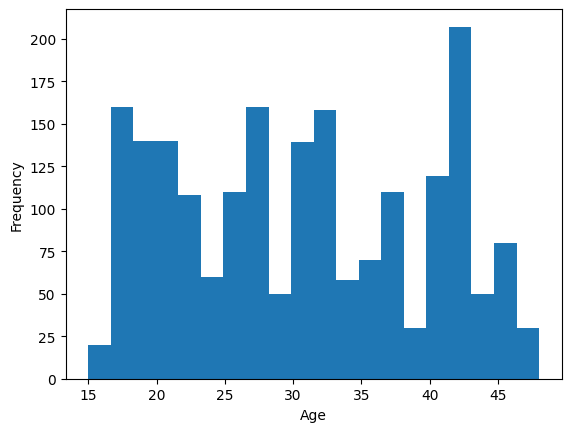

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the data
url = 'https://gist.githubusercontent.com/IndiraSiripurapu/d658c42af84bf864e2883e22f28733d3/raw/964a83a818a23fda9a495d967f9e82c2b7c059ab/BIGDATAPROJECT.csv'
df = pd.read_csv(url)

# Check the basic statistics of the Age column
print(df['Age'].describe())

# Visualize the distribution of Age column using histogram
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


VIZ

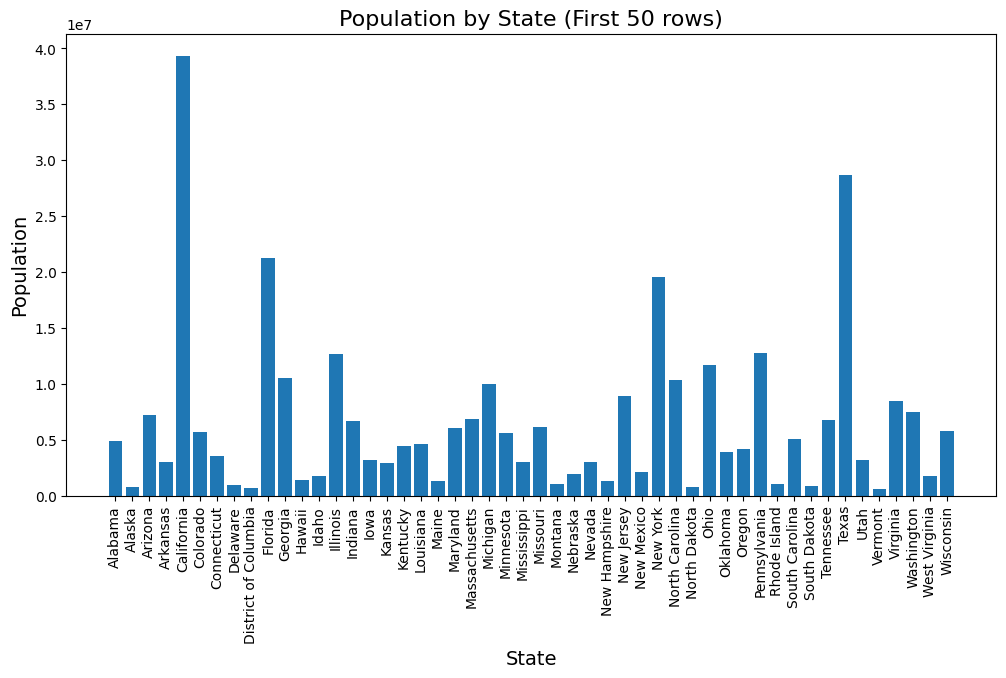

In [149]:
# Slice the dataframe to get only the first 100 rows of data
df = df[:50]

# Group the data by State and sum the Population column
state_pop = df.groupby('State')['Population'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar chart
plt.bar(state_pop['State'], state_pop['Population'])

# Set chart title and axis labels
plt.title('Population by State (First 50 rows)', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Population', fontsize=14)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the chart
plt.show()

In [150]:
# Slice the dataframe to get only the first 50 rows of data
df = df[:50]

# Group the data by State and sum the Population column
state_pop = df.groupby('State')['Population'].sum().reset_index()

# Set the chart title
title = 'Population by State (First 50 rows)'

# Create the bar chart with different colors for each state
fig = px.bar(state_pop, x='State', y='Population', color='State', 
             title=title, labels={'State': 'State', 'Population': 'Population'})
fig.update_layout(xaxis_tickangle=-90)

# Display the chart
fig.show()

In [151]:
# Create a new DataFrame with only the submission_date and tot_cases columns
date_data = df[['submission_date', 'tot_cases']]

# Group the data by submission_date and sum the tot_cases column
date_data = date_data.groupby('submission_date').sum().reset_index()

# Set the chart title
title = 'Total Cases by Date'

# Create the interactive line chart using plotly
fig = px.line(date_data, x='submission_date', y='tot_cases', title=title)

# Customize the chart layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Total Cases',
    font=dict(
        family='Arial',
        size=16,
        color='#2A3F5F'
    ),
    hoverlabel=dict(
        font=dict(
            family='Arial',
            size=14
        )
    )
)

# Display the chart
fig.show()

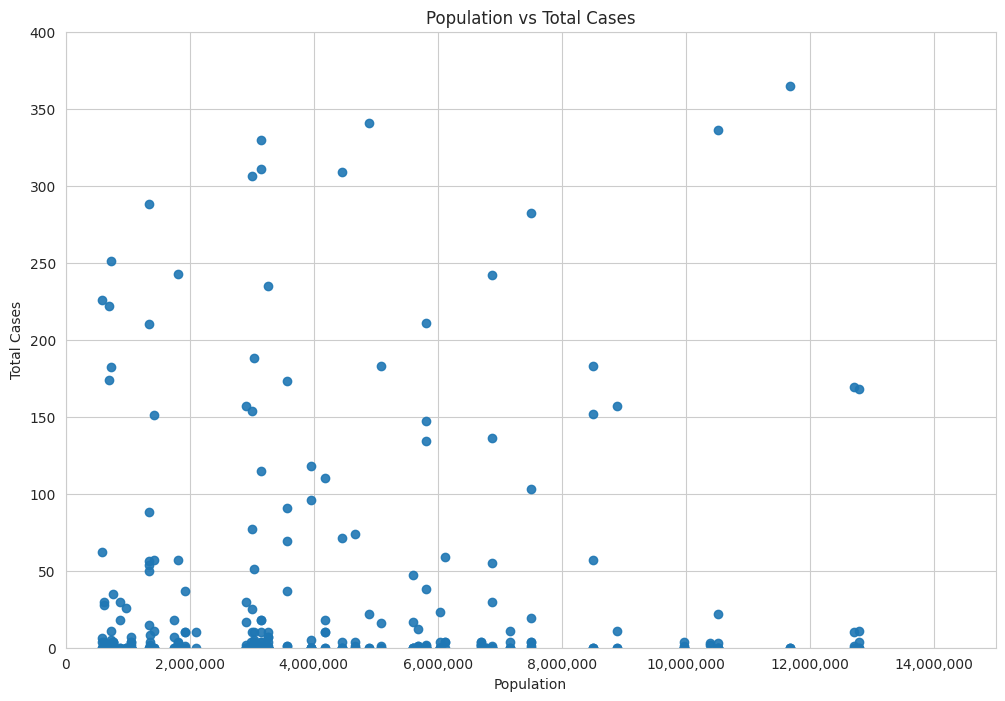

In [167]:
# Convert tot_cases column to numeric
df['tot_cases'] = pd.to_numeric(df['tot_cases'], errors='coerce')

# Drop rows with NaN values in tot_cases column
df.dropna(subset=['tot_cases'], inplace=True)

# Create scatter plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df['Population'], df['tot_cases'], alpha=0.9)
ax.set_xlabel('Population')
ax.set_ylabel('Total Cases')
ax.set_title('Population vs Total Cases')
ax.set_xlim(0, 15000000)
ax.set_ylim(0, 400)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

In [153]:
# Convert tot_cases column to numeric
df['tot_cases'] = pd.to_numeric(df['tot_cases'], errors='coerce')

# Drop rows with NaN values in tot_cases column
df.dropna(subset=['tot_cases'], inplace=True)

# Create scatter plot using Plotly Express
fig = px.scatter(df, x='Population', y='tot_cases', color='Gender', size='tot_cases', hover_name='State', title='Population vs Total Cases by Gender')

# Update the plot appearance
fig.update_layout(
    xaxis_title='Population',
    yaxis_title='Total Cases',
    legend_title='Gender',
    xaxis_tickformat = ',d',
    yaxis_tickformat = ',d',
    width=1000,
    height=800
)

# Show the plot
fig.show()

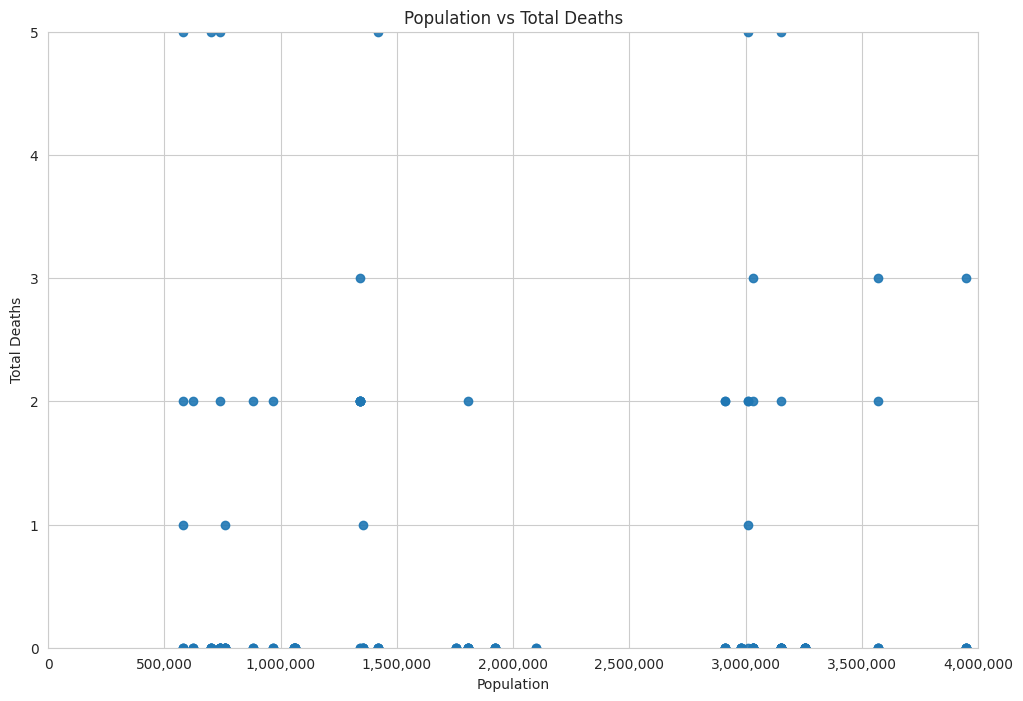

In [168]:
# Convert tot_deaths column to numeric
df['tot_death'] = pd.to_numeric(df['tot_death'], errors='coerce')

# Drop rows with NaN values in tot_deaths column
df.dropna(subset=['tot_death'], inplace=True)

# Create scatter plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df['Population'], df['tot_death'], alpha=0.9)
ax.set_xlabel('Population')
ax.set_ylabel('Total Deaths')
ax.set_title('Population vs Total Deaths')
ax.set_xlim(0, 4000000)
ax.set_ylim(0, 5)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

In [73]:
# Create the scatter plot using Plotly Express
fig = px.scatter(df, x='Population', y='tot_death', color='Gender', hover_name='State', title='Population vs Total Deaths')

# Set the x-axis ticks to be in the millions
fig.update_layout(xaxis_tickformat = '0,0', xaxis_title='Population (in millions)', yaxis_title='Total Deaths')

# Show the plot
fig.show()

In [109]:
# Create the plot
fig = px.scatter(df, x='Age', y='Population', color='Gender', size='Population')

# Add axis titles
fig.update_layout(xaxis_title='Age', yaxis_title='Population')

# Show the plot
fig.show()

In [131]:
# Create the scatter plot using Plotly Express
fig = px.scatter(df, x='Population', y='tot_cases', color='State', hover_data=['State'], title='Total Cases vs. Population by State')

# Display the chart
fig.show()

In [130]:
import pandas as pd
import plotly.express as px

# Read in the data
url = 'https://gist.githubusercontent.com/IndiraSiripurapu/d658c42af84bf864e2883e22f28733d3/raw/964a83a818a23fda9a495d967f9e82c2b7c059ab/BIGDATAPROJECT.csv'
df = pd.read_csv(url)

# Clean the `tot_cases` column by removing commas and converting to integers
df['tot_cases'] = df['tot_cases'].str.replace(',', '').astype(int)

# Create a dictionary to map gender values to colors
gender_color = {'Male': 'blue', 'Female': 'red', 'LGBTQ+': 'purple'}

# Create the scatter plot using Plotly Express
#fig = px.scatter(df, x='Gender', y='tot_cases', color='Gender', size='tot_cases', 
                 #hover_name='Gender', title='Gender and Total Cases',
                 #color_discrete_map=gender_color)
fig = px.scatter(df, x='State', y='tot_cases', color='Gender', size='tot_cases', hover_name='Gender', title='Gender and Total Cases by State')

# Update the plot appearance
fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Total Cases',
    legend_title='Gender'
)

# Show the plot
fig.show()

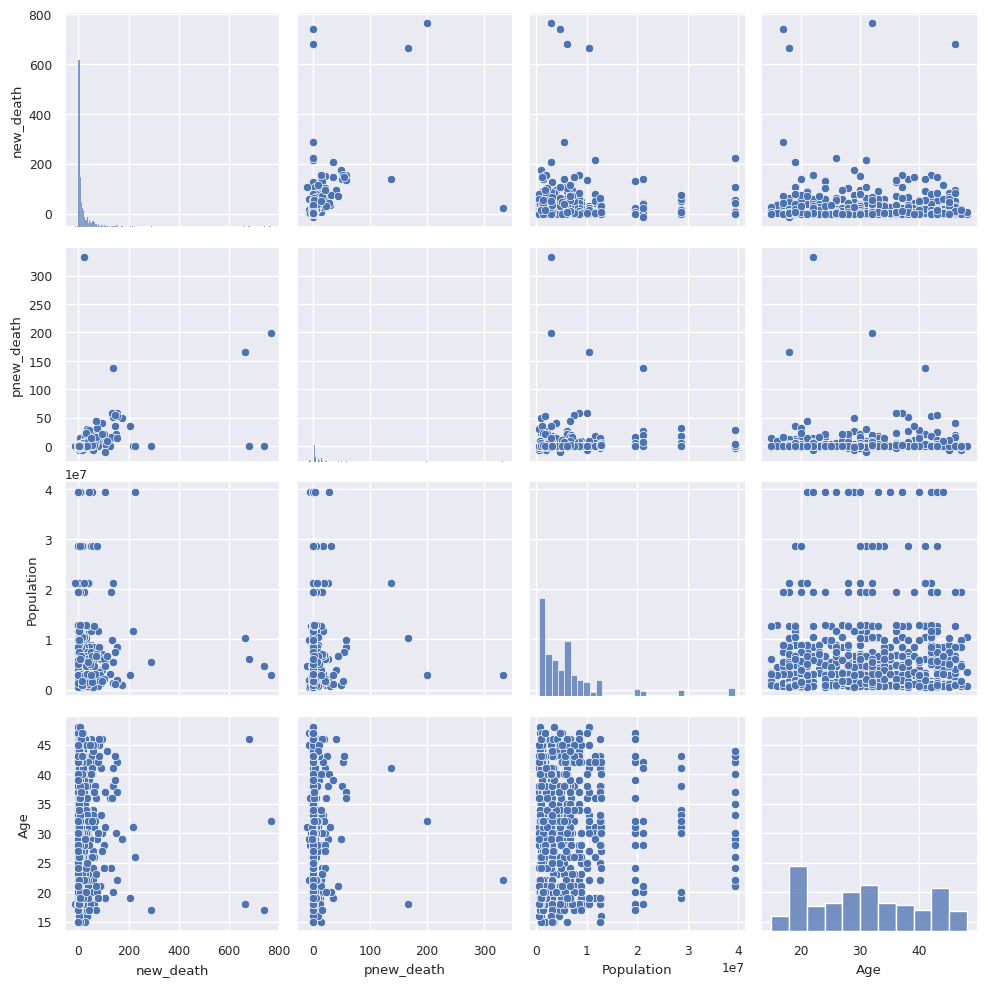

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the data
url = 'https://gist.githubusercontent.com/IndiraSiripurapu/d658c42af84bf864e2883e22f28733d3/raw/964a83a818a23fda9a495d967f9e82c2b7c059ab/BIGDATAPROJECT.csv'
df = pd.read_csv(url)

# Drop rows with missing values
df = df.dropna()

# Create pairplot
sns.set(font_scale=0.8)
g = sns.pairplot(df)
g.fig.set_size_inches(10, 10)
plt.show()

In [163]:
import plotly.express as px

# Read in the data
url = 'https://gist.githubusercontent.com/IndiraSiripurapu/d658c42af84bf864e2883e22f28733d3/raw/964a83a818a23fda9a495d967f9e82c2b7c059ab/BIGDATAPROJECT.csv'
df = pd.read_csv(url)

# Create heatmap
fig = px.imshow(df.corr(), color_continuous_scale='RdBu')

# Customize the layout
fig.update_layout(
    title='Correlation Heatmap of BIGDATAPROJECT Dataset',
    width=1000,
    height=800,
    xaxis=dict(title='Column Index'),
    yaxis=dict(title='Column Index')
)

# Show the plot
fig.show()


<ipython-input-163-a57479bc664a>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

